In [14]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Loading the raw science image
science_file = "/Users/jonathan.a.chavez9/Desktop/GBO-Calibration/Dummy_Data/rawg'.fts"
raw_data = fits.getdata(science_file)

# Loading the flat field image
flat_field_file = "/Users/jonathan.a.chavez9/Desktop/GBO-Calibration/Dummy_Data/flatg'.fts"
flat_data = fits.getdata(flat_field_file)

# Loading the dark frame image
dark_frame_file = "/Users/jonathan.a.chavez9/Desktop/GBO-Calibration/Dummy_Data/dark.fts"
dark_data = fits.getdata(dark_frame_file)

# Normalizing the flat field
normalized_flat = flat_data / np.median(flat_data)

# Calibrating the science image
calibrated_data = (raw_data - dark_data) / normalized_flat

# Saving the calibrated image to a new FITS file
calibrated_file = "/Users/jonathan.a.chavez9/Desktop/GBO-Calibration/calibratedg'.fits"
fits.writeto(calibrated_file, calibrated_data, overwrite=True)

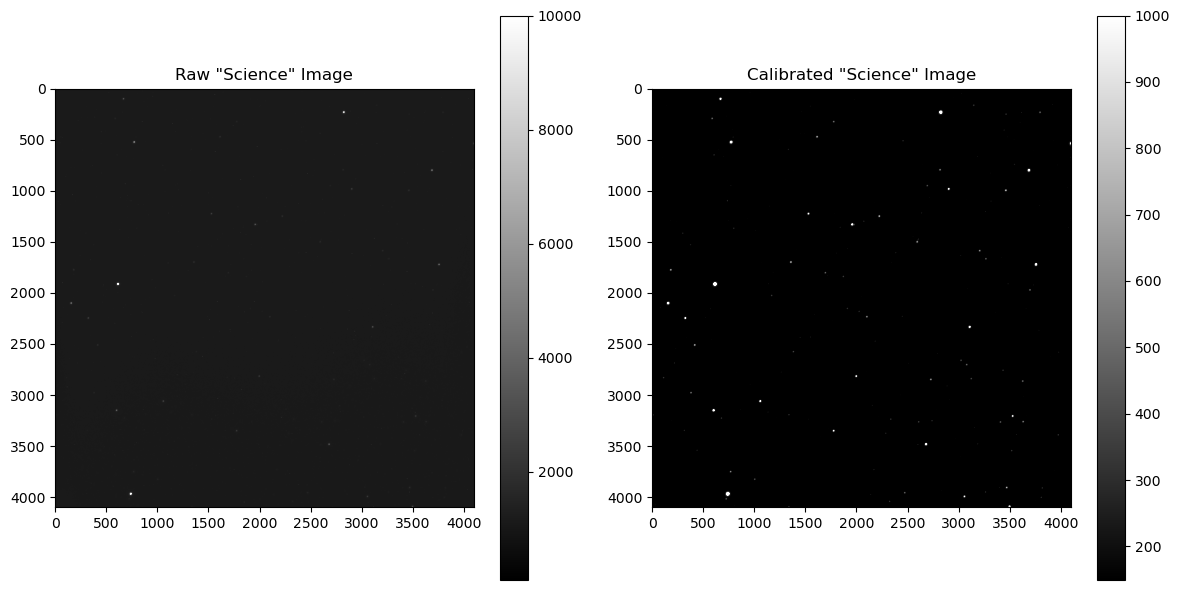

In [13]:
plt.figure(figsize=(12, 6))

# Displaying the raw image
plt.subplot(1, 2, 1)
plt.imshow(raw_data, cmap='gray', vmin=100, vmax=10000)
plt.title('Raw "Science" Image')
plt.colorbar()

# Displaying the calibrated image
plt.subplot(1, 2, 2)
plt.imshow(calibrated_data, cmap='gray', vmin=1000, vmax=np.percentile(calibrated_data, 99)) #99th percentile provides clarity while preventing oversaturation
plt.title('Calibrated "Science" Image')
plt.colorbar()
plt.tight_layout()
plt.show()